# 시뮬레이션방법론 실습 {.unnumbered}

In [1]:
import os
if os.getcwd()!='/Users/hwan/Desktop/Homepage/study_24fall/실습':
    os.chdir('실습')
os.getcwd()

'/Users/hwan/Desktop/Homepage/study_24fall/실습'

## Ch2. 난수 생성 방법

### Acceptance-rejection method

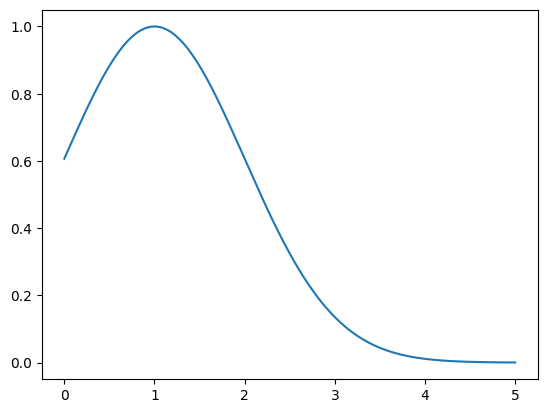

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

f = lambda x: 2/np.sqrt(2*np.pi)*np.exp(-x**2/2)
g = lambda x: np.exp(-x)
Ginv = lambda x: -np.log(1-x)
x = np.linspace(0,5,501)
c = np.sqrt(2/np.pi)*np.exp(0.5)

#c = 1
plt.plot(x,f(x)/(c*g(x)))
plt.show()

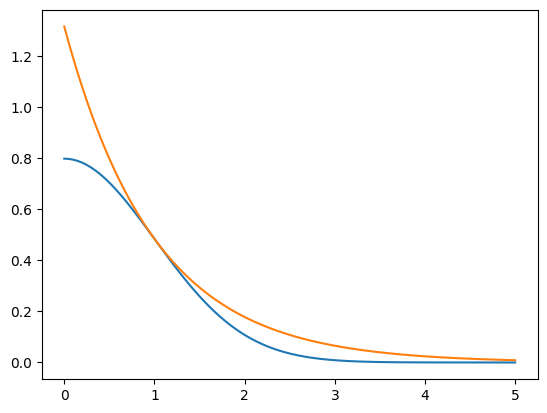

In [3]:
plt.plot(x,f(x))
plt.plot(x,c*g(x))
plt.show()

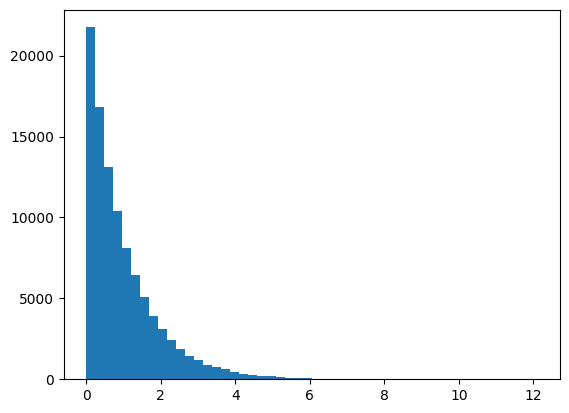

In [4]:
#random sampling from Exponential dist.
n = 100000
e = np.random.rand(n)
x = Ginv(e)
plt.hist(x, bins=50)
plt.show()

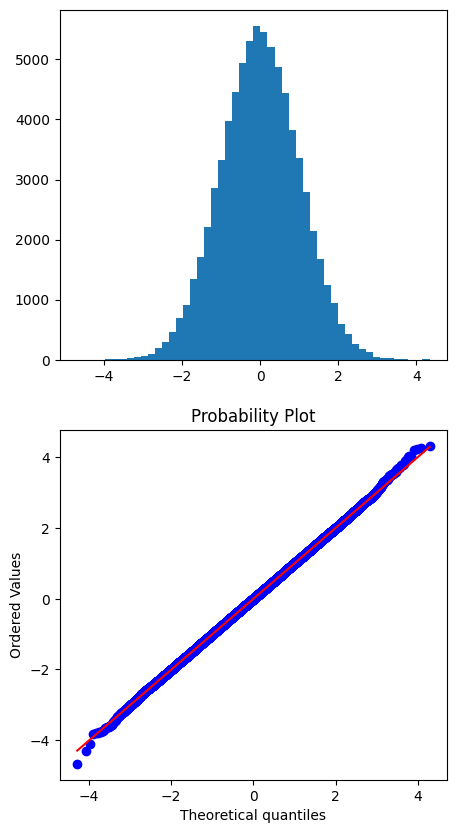

In [5]:
#acceptance-rejection
u = np.random.rand(n)
idx = u < (f(x) / (c*g(x)))
y = x[idx]

#signx
s = np.random.rand(len(y))
sign = (+1)*(s>0.5) + (-1)*(s<=0.5)
z  = y * sign

fig, ax = plt.subplots(2,1,figsize=(5,10))
ax[0].hist(z, bins=50)
stats.probplot(z, dist="norm", plot=ax[1])
plt.show()

In [6]:
# accept된 갯수, 통계량
z = pd.Series(z)
print("Size = ", len(z))
print("Mean = ", z.mean())
print("Std = ", z.std())
print("Skewness = ", z.skew())
print("Kurtosis = ", z.kurt())

Size =  76149
Mean =  -0.0007738332678312738
Std =  1.0026630200413653
Skewness =  0.0014052484620287072
Kurtosis =  0.02832094979234201


Mean =  -0.0005109536692502728
Std =  1.0033155307284243
Skewness =  0.02486394723725498
Kurtosis =  0.004147895282052172


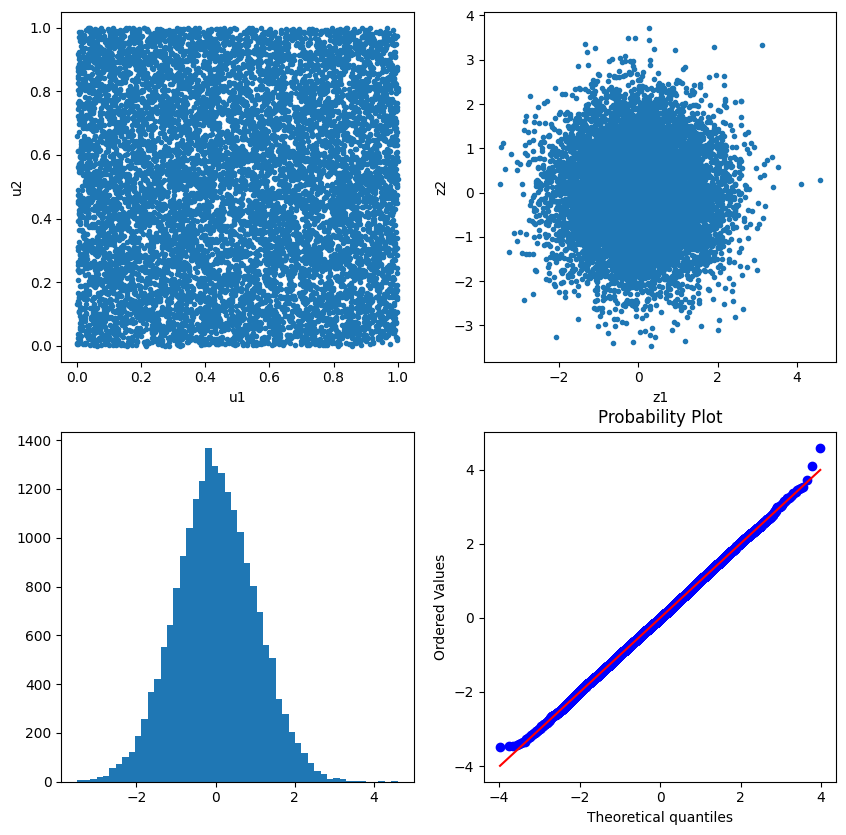

In [7]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats


u1 = np.random.rand(10000)
u2 = np.random.rand(10000)

z1 = np.sqrt(-2*np.log(u1))*np.cos(2*np.pi*u2)
z2 = np.sqrt(-2*np.log(u1))*np.sin(2*np.pi*u2)

fig, ax = plt.subplots(2,2,figsize=(10,10))
ax[0,0].plot(u1,u2,'.')
ax[0,0].set_xlabel("u1")
ax[0,0].set_ylabel("u2")
ax[0,1].plot(z1,z2,'.')
ax[0,1].set_xlabel("z1")
ax[0,1].set_ylabel("z2")

z = np.concatenate([z1,z2])
ax[1,0].hist(z, bins=50)
stats.probplot(z, dist="norm", plot=ax[1,1])

z = pd.Series(z)
print("Mean = ", z.mean())
print("Std = ", z.std())
print("Skewness = ", z.skew())
print("Kurtosis = ", z.kurt())

### Box-muller method
#### u1과 u2를 극좌표 변환(길이,각도)하여 표준정규난수를 생성

((array([-3.39232293, -3.14126578, -3.00201262, ...,  3.00201262,
          3.14126578,  3.39232293]),
  array([-3.60306231, -3.13548782, -2.83263488, ...,  3.03258201,
          3.06619721,  3.32173166])),
 (1.0327708990587872, 0.05466952756732349, 0.9996989636334398))

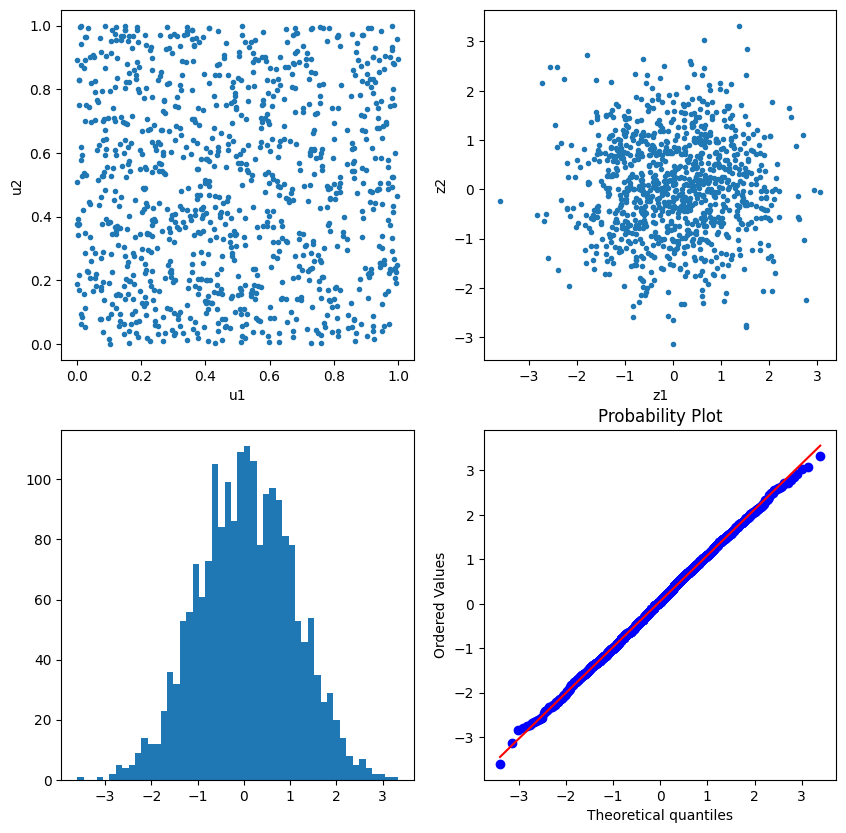

In [8]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats


u1 = np.random.rand(1000)
# u1 = np.array(np.repeat(0.2,1000))

u2 = np.random.rand(1000)
# u2 = np.repeat(0.3,1000)

z1 = np.sqrt(-2*np.log(u1))*np.cos(2*np.pi*u2)
z2 = np.sqrt(-2*np.log(u1))*np.sin(2*np.pi*u2)

fig, ax = plt.subplots(2,2,figsize=(10,10))
ax[0,0].plot(u1,u2,'.')
ax[0,0].set_xlabel("u1")
ax[0,0].set_ylabel("u2")
ax[0,1].plot(z1,z2,'.')
ax[0,1].set_xlabel("z1")
ax[0,1].set_ylabel("z2")

z = np.concatenate([z1,z2])
ax[1,0].hist(z, bins=50)
stats.probplot(z, dist="norm", plot=ax[1,1])

In [9]:
z = pd.Series(z)
print("Mean = ", z.mean())
print("Std = ", z.std())
print("Skewness = ", z.skew())
print("Kurtosis = ", z.kurt())

Mean =  0.05466952756732329
Std =  1.0317810356699553
Skewness =  -0.018633416552330598
Kurtosis =  -0.17031449124549036


### Marsaglia's polar method

((array([-3.92157497, -3.70243821, -3.58239836, ...,  3.58239836,
          3.70243821,  3.92157497]),
  array([-2.39692813, -2.31770256, -2.29498998, ...,  2.50125154,
          2.86382852,  3.07531846])),
 (0.7077405533780114, 0.0010379840057725947, 0.9999066551363593))

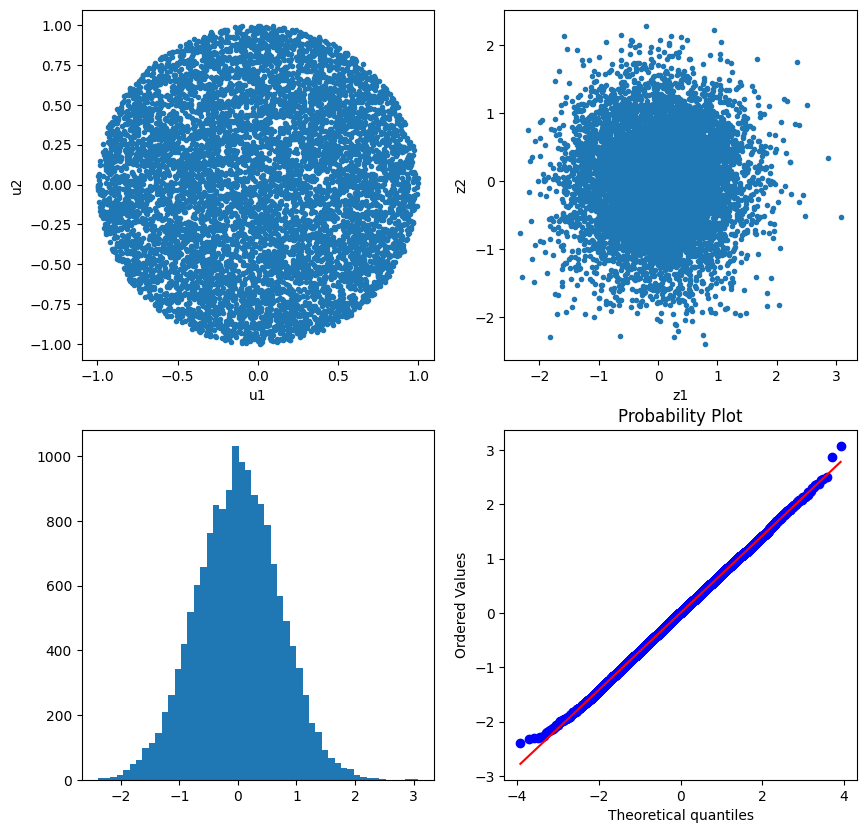

In [10]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

u1 = 2*np.random.rand(10000) - 1
u2 = 2*np.random.rand(10000) - 1
idx = u1**2+u2**2<1
u1 = u1[idx]
u2 = u2[idx]
r = np.sqrt(u1**2 + u2**2)
z1 = u1*np.sqrt(-2*np.log(r)/(r**2))
z2 = u2*np.sqrt(-2*np.log(r)/(r**2))

fig, ax = plt.subplots(2,2,figsize=(10,10))
ax[0,0].plot(u1,u2,'.')
ax[0,0].set_xlabel("u1")
ax[0,0].set_ylabel("u2")
ax[0,1].plot(z1,z2,'.')
ax[0,1].set_xlabel("z1")
ax[0,1].set_ylabel("z2")

z = np.concatenate([z1,z2])
ax[1,0].hist(z, bins=50)
stats.probplot(z, dist="norm", plot=ax[1,1])

In [11]:
# 표준편차 이상함
z = pd.Series(z)
print("Mean = ", z.mean())
print("Std = ", z.std())
print("Skewness = ", z.skew())
print("Kurtosis = ", z.kurt())

Mean =  0.001037984005772708
Std =  0.7076612420548687
Skewness =  -0.007878945852490927
Kurtosis =  -0.0333895630592389


### Correlated random

In [12]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

corr = np.array([[1,0.3,0.5],[0.3,1,0.6],[0.5,0.6,1]])
pos_def = np.all(np.linalg.eigvals(corr) > 0)
print(corr)
print(pos_def)

[[1.  0.3 0.5]
 [0.3 1.  0.6]
 [0.5 0.6 1. ]]
True


In [13]:
#Cholesky Decomposition
c = np.linalg.cholesky(corr)
x = np.random.randn(10000,3)
y = x @ c.T

y = pd.DataFrame(y, columns=['z1','z2','z3'])
print("Mean")
print(y.apply(['mean','std']))
print()

print("Correlation")
print(y.corr())

Mean
            z1        z2        z3
mean  0.015803 -0.003859 -0.004027
std   1.000498  1.011745  1.008933

Correlation
          z1        z2        z3
z1  1.000000  0.308514  0.509939
z2  0.308514  1.000000  0.602482
z3  0.509939  0.602482  1.000000


In [14]:
#Positive Definite 하지 않은 상관계수 행렬 생성 (3번째 변수를 선형결합으로 생성)
pos_def = True
while pos_def:
    x = np.random.randn(1000, 2)
    x = np.concatenate([x[:,0:1], x[:,0:1]+x[:,1:2], x[:,0:1]-2*x[:,1:2]], axis=1)
    corr = pd.DataFrame(x).corr()
    pos_def = np.all(np.linalg.eigvals(corr) > 0)

print(corr)
print(pos_def)

          0         1         2
0  1.000000  0.726141  0.460392
1  0.726141  1.000000 -0.276035
2  0.460392 -0.276035  1.000000
False


In [15]:
#cholesky: error
#c = np.linalg.cholesky(corr)

#Eigenvalue Decomposition
values, vectors = np.linalg.eig(corr)
values = np.maximum(0, values)
B = vectors @ np.diag(np.sqrt(values))
print(B)
print()
print(B @ B.T)
print()

[[ 0.          0.98367741  0.17994096]
 [ 0.          0.83800603 -0.54566097]
 [ 0.          0.29314128  0.95606913]]

[[ 1.          0.72614084  0.46039245]
 [ 0.72614084  1.         -0.27603545]
 [ 0.46039245 -0.27603545  1.        ]]



In [16]:
z = np.random.randn(10000,3)
y = z @ B.T

y = pd.DataFrame(y, columns=['z1','z2','z3'])
print("Mean")
print(y.apply(['mean','std']))
print()
print("Correlation")
print(y.corr())

Mean
            z1        z2        z3
mean -0.009456 -0.017486  0.009358
std   1.004328  1.003282  0.998185

Correlation
          z1        z2        z3
z1  1.000000  0.729317  0.460086
z2  0.729317  1.000000 -0.271913
z3  0.460086 -0.271913  1.000000


In [17]:
#Singular value decomposition
print("=== original data ===")
print(pd.DataFrame(x).apply(['mean','std']))
print(pd.DataFrame(x).corr())
print()

U, S, Vh = np.linalg.svd(x)
np.allclose(U[:,:3] @ np.diag(S) @ Vh, x)

B = Vh.T @ np.diag(S) / np.sqrt(len(x))
z = np.random.randn(10000,3)
y = z @ B.T

print("=== simulation data ===")
y = pd.DataFrame(y, columns=['z1','z2','z3'])
print("Mean")
print(y.apply(['mean','std']))
print()
print("Correlation")
print(y.corr())

=== original data ===
             0         1         2
mean  0.044162  0.067192 -0.001899
std   1.039992  1.440805  2.231840
          0         1         2
0  1.000000  0.726141  0.460392
1  0.726141  1.000000 -0.276035
2  0.460392 -0.276035  1.000000

=== simulation data ===
Mean
            z1        z2        z3
mean  0.008099  0.014018 -0.003738
std   1.041920  1.451097  2.234800

Correlation
          z1        z2        z3
z1  1.000000  0.727481  0.453941
z2  0.727481  1.000000 -0.281128
z3  0.453941 -0.281128  1.000000


## Ch3. 샘플 경로 생성 방법

### Variance reduction

In [19]:
import numpy as np
from blackscholes import bsprice

def mcprice_controlvariates(s,k,r,q,t,sigma,nsim,flag):
    z = np.random.randn(nsim)
    st = s*np.exp((r-q-0.5*sigma**2)*t + sigma*np.sqrt(t)*z)
    callOrPut = 1 if flag.lower()=='call' else -1    
    payoff = np.maximum(callOrPut*(st-k), 0)    
    disc_payoff = np.exp(-r*t)*payoff
    price = disc_payoff.mean()    
    se = disc_payoff.std(ddof=1) / np.sqrt(nsim)

    c = np.cov((disc_payoff, st), ddof=1)    
    cv_disc_payoff = disc_payoff - c[1,0]/c[1,1]*(st-s*np.exp((r-q)*t))
    cv_price = cv_disc_payoff.mean()
    cv_se = cv_disc_payoff.std(ddof=1) / np.sqrt(nsim)

    return price, se, cv_price, cv_se 


def mcprice_antithetic(s,k,r,q,t,sigma,nsim,flag):
    z = np.random.randn(nsim)
    st = s*np.exp((r-q-0.5*sigma**2)*t + sigma*np.sqrt(t)*z)
    callOrPut = 1 if flag.lower()=='call' else -1    
    payoff = np.maximum(callOrPut*(st-k), 0)    
    disc_payoff = np.exp(-r*t)*payoff
    price = disc_payoff.mean()    
    se = disc_payoff.std(ddof=1) / np.sqrt(nsim)

    z[nsim/2:] = -z[:nsim]
    st = s*np.exp((r-q-0.5*sigma**2)*t + sigma*np.sqrt(t)*z)
    payoff = np.maximum(callOrPut*(st-k), 0)    
    disc_payoff = np.exp(-r*t)*payoff
    price2 = disc_payoff.mean()    
    se2 = disc_payoff.std(ddof=1) / np.sqrt(nsim)
    return price, se, price2, se2 

s, k, r, q, t, sigma = 100, 100, 0.03, 0.01, 0.25, 0.2
flag = 'put'

#Analytic Formula
price = bsprice(s,k,r,q,t,sigma,flag)
print(f"   Price = {price:0.6f}")
print("-"*50)
#Control-Variates Simulation
nsim = 100000
mc_price, se, cv_price, cv_se= mcprice_controlvariates(s,k,r,q,t,sigma,nsim,flag)
print(f"MC Price = {mc_price:0.6f} / se = {se:0.6f}")
print(f"CV Price = {cv_price:0.6f} / se = {cv_se:0.6f}")
print("-"*50)
#Antithetic
mc_price, se, price2, se2= mcprice_controlvariates(s,k,r,q,t,sigma,nsim,flag)
print(f"MC Price = {mc_price:0.6f} / se = {se:0.6f}")
print(f"Antithetic Price = {price2:0.6f} / se = {se2:0.6f}")
print("-"*50)

   Price = 3.724086
--------------------------------------------------
MC Price = 3.742272 / se = 0.016858
CV Price = 3.744590 / se = 0.009456
--------------------------------------------------
MC Price = 3.728164 / se = 0.016863
Antithetic Price = 3.728332 / se = 0.009425
--------------------------------------------------
